In [1]:
'''Import and first test with scikit'''

'Import and first test with scikit'

In [448]:
#modules
import csv
import collections
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score
% matplotlib inline

In [3]:
#files
folder='D:/IA/Kaggle/Facebook/'
training=folder+'train.csv'
small=folder+'cell.csv'

In [211]:
#load data
with open(training, 'r',newline='') as csvfile:
    reader=csv.reader(csvfile)
    print(reader.__next__())
datab=np.loadtxt(small, delimiter=",",skiprows=1)
print(datab.shape)
print(datab[0])

['row_id', 'x', 'y', 'accuracy', 'time', 'place_id']
(70890, 6)
[  5.06000000e+02   7.45800000e-01   5.13320000e+00   1.48000000e+02
   4.42772000e+05   1.06003099e+09]


In [230]:
#prepare X and y
pos_time=4
X=np.concatenate((datab[:,[1,2,3]],datab[:,[pos_time]]%1440,(datab[:,[pos_time]]//1440)%7),axis=1)
y=np.ravel(datab[:,[5]]).astype('int64')
print(X.shape)
print(X[0])

(70890, 5)
[   0.7458    5.1332  148.      692.        6.    ]


In [ ]:
# K NEAREST NEIGHBORS

In [332]:
#prepare the algorithm

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0.0005,1/18000,0.0001]
knn = KNeighborsClassifier(n_neighbors=15, 
                           algorithm='auto',
                           weights='distance',#'uniform' or 'distance'
                           metric='minkowski',
                           p=2,
                           metric_params=None, 
                           leaf_size=30, 
                           n_jobs=1)

In [333]:
#cut train and test
test_size=10000

np.random.seed()
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]*weights
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]*weights
y_test  = y[indices[-test_size:]]

print((X*weights)[0])

[  3.72900000e-01   5.13320000e+00   7.40000000e-02   3.84444444e-02
   6.00000000e-04]


In [334]:
#train and test
knn.fit(X_train, y_train) 
print(knn.score(X_test,y_test)*100,'%')

55.56 %


In [368]:
#cross validation (better than previous tests)
cvi=KFold(len(X), n_folds=5, shuffle=True, random_state=None)
scores=cross_val_score(knn, X*weights, y, scoring=None, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
print("Accuracy: {0:.2f} (+/- {1:.2f}) %".format(scores.mean()*100, scores.std() * 200))

Accuracy: 54.84 (+/- 0.87) %


In [371]:
#get the predictions back
predicted = cross_val_predict(knn, X*weights, y, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
print(accuracy_score(y, predicted))

NameError: name 'accuracy_score' is not defined

In [234]:
# --------> 55% on test set

In [337]:
# RANDOM FOREST

In [347]:
#prepare

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0.0005,1/18000,0.0001]
rfc = RandomForestClassifier(n_estimators=4, 
                             criterion='gini', 
                             max_depth=10, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             bootstrap=True, 
                             oob_score=False, 
                             n_jobs=1, 
                             random_state=None, 
                             verbose=0, 
                             warm_start=False, 
                             class_weight=None)

In [348]:
#cut
test_size=10000

np.random.seed()
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]*weights
y_train = y[indices[:-test_size]]
X_test  = X[indices[-test_size:]]*weights
y_test  = y[indices[-test_size:]]

print((X*weights)[0])

[  3.72900000e-01   5.13320000e+00   7.40000000e-02   3.84444444e-02
   6.00000000e-04]


In [349]:
#train     
rfc.fit(X_train, y_train) 
print(rfc.score(X_test,y_test)*100,'%')

46.29 %


In [ ]:
# 52% with      !!!!! takes 5 minutes
weights=[1/2,1,0.0005,1/18000,0.0001]
rfc = RandomForestClassifier(n_estimators=10, 
                             criterion='gini', 
                             max_depth=10, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             bootstrap=True, 
                             oob_score=False, 
                             n_jobs=1, 
                             random_state=None, 
                             verbose=0, 
                             warm_start=False, 
                             class_weight=None)

In [ ]:
further :
    test different values
    implement in all square
    see where is the error :
        maybe not in the center
        maybe only on poor represented places:
            maybe there are not such ones in the submission
    compute size of square :
        with neighboring squares helping?
        each place id contained in one square?
    compute in several neighboring squares and take the best?
    classifications methods:
        real edges?
        Expectation maximization with the center?
    do script for automatic test: ----------------
        automatic results show:
            position
            what ids
    predict proba?
    see shape of output file
    group alone members and run another algo on them

In [444]:
N_cross_validation,X,y=2,X,y

def testNrate(classifier,weights=None,output_file_name='testNrate'):
    cvi=KFold(len(X), n_folds=N_cross_validation, shuffle=True, random_state=None)
    predicted = cross_val_predict(classifier, X*weights, y, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    right=y==predicted
    print("Accuracy: {0:.2f}%".format(sum(right)/len(right)*100))
    fig = plt.figure(figsize=(40, 20))
    ax1 = fig.add_subplot(121,aspect=1)
    ax2 = fig.add_subplot(122)
    ax1.scatter(X[:,[0]],X[:,[1]],c=right,linewidths=0)
    ax1.scatter(X[:,[0]],X[:,[1]],c=right,linewidths=0)
    return fig
    

Accuracy: 53.88%


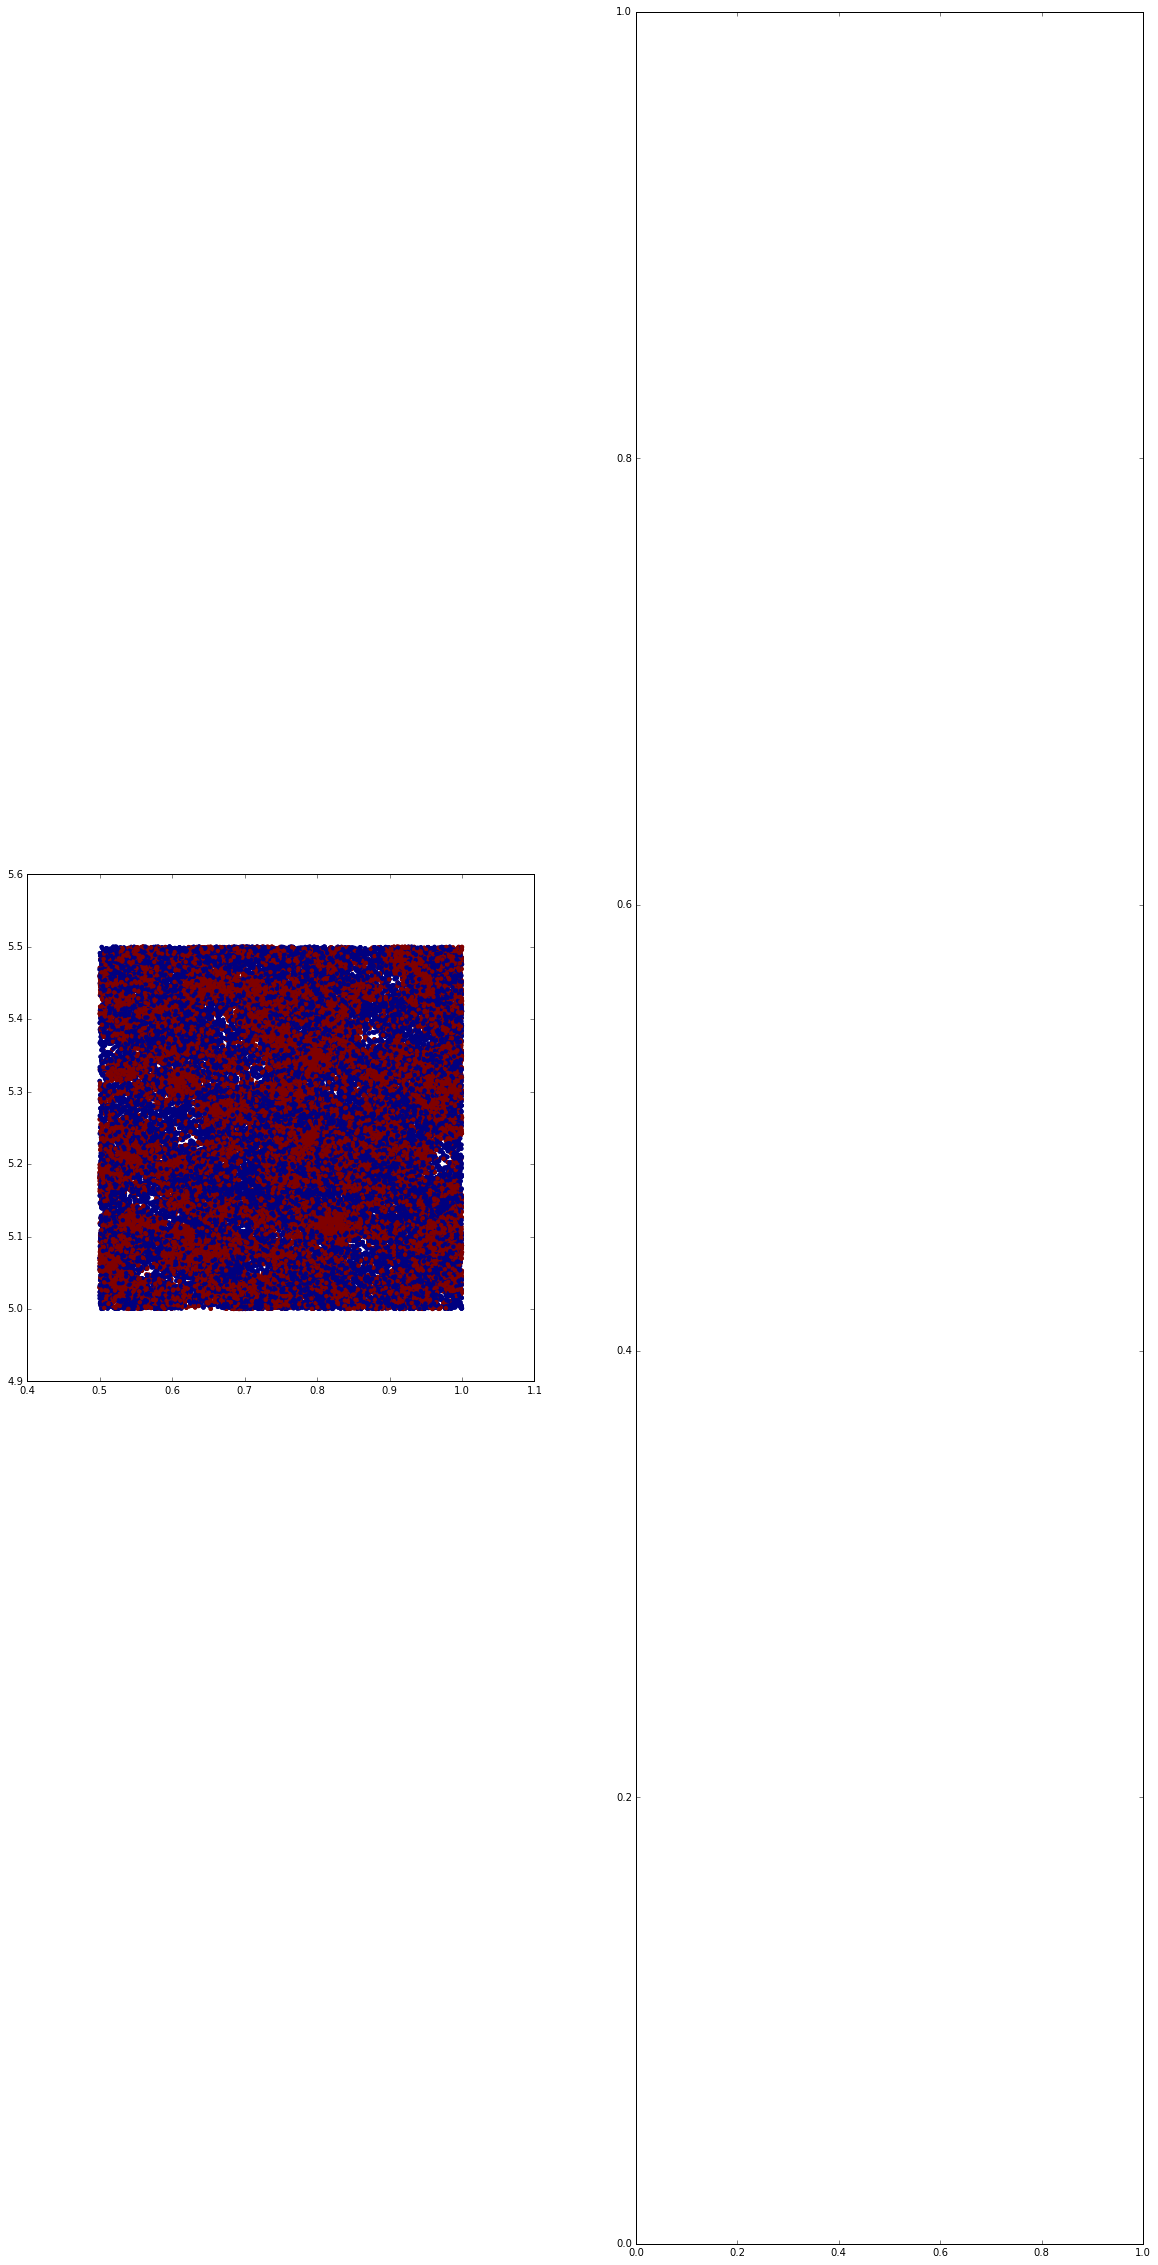

In [445]:
weights=[1/2,1,0.0005,1/18000,0.0001]
knn = KNeighborsClassifier(n_neighbors=15, 
                           algorithm='auto',
                           weights='distance',#'uniform' or 'distance'
                           metric='minkowski',
                           p=2,
                           metric_params=None, 
                           leaf_size=30, 
                           n_jobs=1)
fig=testNrate(knn,weights)

Accuracy: 53.96%


SyntaxError: 'return' outside function (<ipython-input-446-06731af9abbd>, line 10)

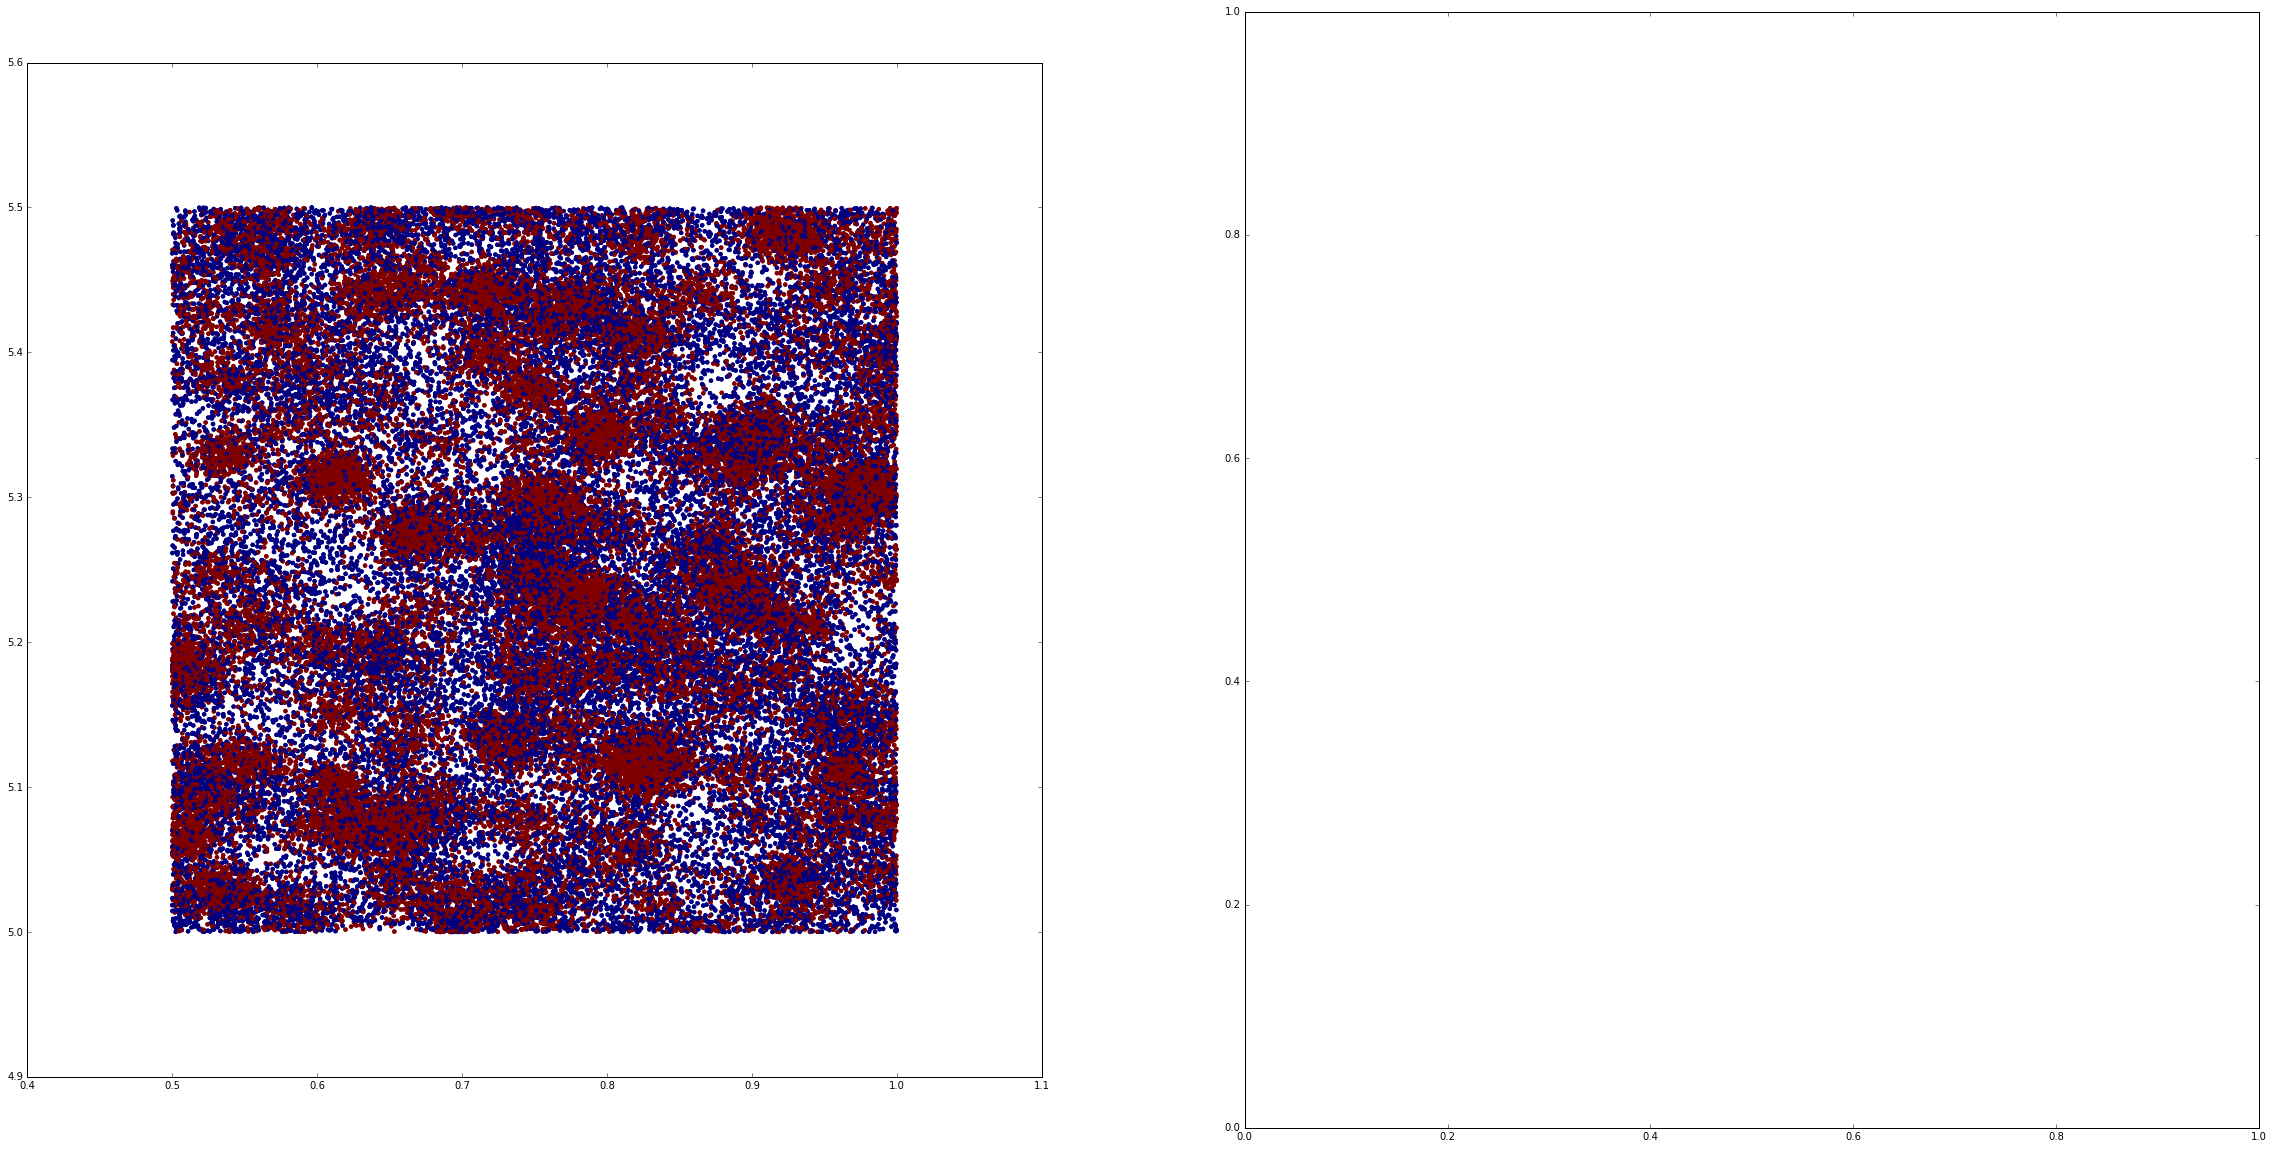

In [446]:
cvi=KFold(len(X), n_folds=N_cross_validation, shuffle=True, random_state=None)
predicted = cross_val_predict(knn, X*weights, y, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
right=y==predicted
print("Accuracy: {0:.2f}%".format(sum(right)/len(right)*100))
fig = plt.figure(figsize=(40, 20))
ax1 = fig.add_subplot(121,aspect=1)
ax2 = fig.add_subplot(122)
ax1.scatter(X[:,[0]],X[:,[1]],c=right,linewidths=0)
ax1.scatter(X[:,[0]],X[:,[1]],c=right,linewidths=0)


In [456]:
numberTot=collections.defaultdict(int)
numberFou=collections.defaultdict(int)
for real_v, found in zip(y,right):
    numberTot[real_v]+=1
    if found:
        numberFou[real_v]+=1

In [451]:
print(sorted(numberTot.items(), key=lambda v: numberTot[v]))

[(4061843456, 101), (6297636866, 2), (5692760070, 1), (9106759689, 1), (5343969290, 2), (4350038027, 9), (5285756941, 30), (6034198544, 7), (6733590547, 1), (9290809366, 2), (8284161785, 1), (2252650500, 1), (5383041050, 1), (6840160284, 99), (5746597917, 22), (3003883554, 1), (2210603043, 3), (2520719311, 1), (5401752241, 103), (2806599723, 7), (5138456621, 4), (4083560494, 1), (2911032669, 4), (7384535090, 1), (5739327545, 1), (1202863567, 1), (3342360632, 1), (3788472377, 4), (8158494778, 1), (7709433915, 1), (5310640192, 3), (4133109826, 8), (9855414339, 14), (6807061471, 1), (8871120967, 16), (7030992969, 2), (3169366092, 3), (1316393038, 1), (9518379089, 4), (6559080532, 149), (7325835349, 60), (8970713785, 1), (3852697688, 1), (2904866905, 100), (8719077466, 4), (7758884959, 10), (3536134240, 1), (5447417872, 4), (4064239714, 972), (6299037795, 1), (2999722084, 1), (1908756581, 1), (8686710889, 2), (7643320426, 21), (3596390508, 1), (4478131895, 3), (7385588413, 3), (8743571568,

In [469]:
mylist=[]
for i in numberTot:
    print(i,numberTot[i],numberFou[i])
    mylist.append((numberTot[i],numberFou[i]))

4061843456 101 9
6297636866 2 0
5692760070 1 0
9106759689 1 0
5343969290 2 0
4350038027 9 0
5285756941 30 0
6034198544 7 0
6733590547 1 0
9290809366 2 0
8284161785 1 0
2252650500 1 0
5383041050 1 0
6840160284 99 48
5746597917 22 0
3003883554 1 0
2210603043 3 0
2520719311 1 0
5401752241 103 24
2806599723 7 0
5138456621 4 0
4083560494 1 0
2911032669 4 0
7384535090 1 0
5739327545 1 0
1202863567 1 0
3342360632 1 0
3788472377 4 0
8158494778 1 0
7709433915 1 0
5310640192 3 0
4133109826 8 0
9855414339 14 1
6807061471 1 0
8871120967 16 0
7030992969 2 0
3169366092 3 0
1316393038 1 0
9518379089 4 0
6559080532 149 71
7325835349 60 1
8970713785 1 0
3852697688 1 0
2904866905 100 32
8719077466 4 0
7758884959 10 0
3536134240 1 0
5447417872 4 0
4064239714 972 807
6299037795 1 0
2999722084 1 0
1908756581 1 0
8686710889 2 0
7643320426 21 0
3596390508 1 0
4478131895 3 0
7385588413 3 0
8743571568 2 0
6471176306 2 0
8678187127 4 0
4725751930 11 0
2198712443 1 0
9288700028 8 0
3891490944 3 0
1216225409 1 0


In [470]:
mylist.sort(reverse=True)

In [471]:
print(mylist)

[(1447, 1296), (1269, 1004), (1029, 984), (972, 807), (946, 795), (889, 768), (821, 695), (802, 629), (797, 517), (757, 559), (749, 608), (723, 282), (722, 637), (688, 598), (675, 611), (665, 428), (658, 536), (648, 528), (628, 517), (609, 521), (579, 405), (554, 293), (528, 441), (527, 415), (527, 396), (508, 453), (504, 448), (497, 431), (496, 253), (494, 313), (484, 345), (464, 431), (455, 354), (438, 265), (435, 265), (432, 275), (427, 376), (425, 357), (414, 324), (411, 253), (404, 340), (403, 342), (382, 284), (372, 287), (362, 277), (356, 291), (337, 257), (329, 272), (329, 216), (327, 170), (324, 218), (320, 205), (316, 96), (313, 263), (311, 164), (310, 163), (307, 216), (298, 191), (296, 239), (296, 106), (288, 183), (285, 184), (275, 212), (275, 196), (270, 183), (267, 139), (259, 119), (259, 111), (257, 149), (255, 83), (253, 186), (248, 157), (244, 160), (244, 115), (243, 202), (240, 141), (234, 169), (233, 153), (232, 182), (231, 105), (231, 32), (226, 187), (225, 169), (

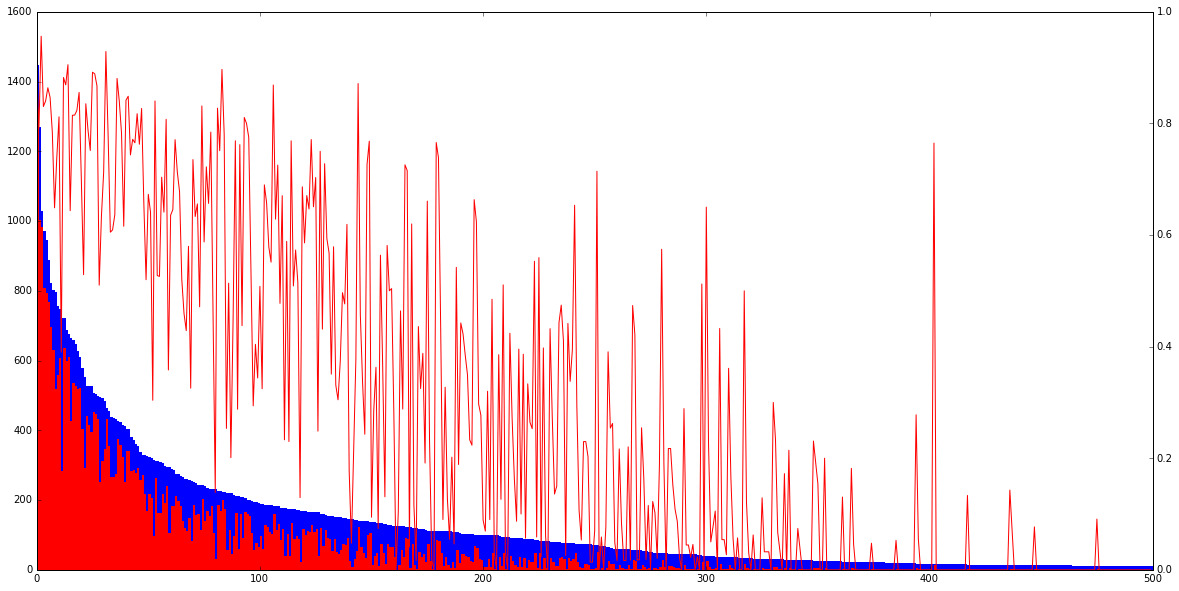

In [502]:
until=500
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.bar(range(until),list(zip(*mylist))[0][:until],linewidth=0,width=1)
ax.bar(range(until),list(zip(*mylist))[1][:until],linewidth=0,color='r',width=1)
ax2=ax.twinx()
ax2.plot(range(until),[r/e for e,r in mylist][:until],color='r')

In [486]:
help(ax.bar)

Help on method bar in module matplotlib.axes._axes:

bar(left, height, width=0.8, bottom=None, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
      

In [481]:
print(list(zip(*mylist))[0])

(1447, 1269, 1029, 972, 946, 889, 821, 802, 797, 757, 749, 723, 722, 688, 675, 665, 658, 648, 628, 609, 579, 554, 528, 527, 527, 508, 504, 497, 496, 494, 484, 464, 455, 438, 435, 432, 427, 425, 414, 411, 404, 403, 382, 372, 362, 356, 337, 329, 329, 327, 324, 320, 316, 313, 311, 310, 307, 298, 296, 296, 288, 285, 275, 275, 270, 267, 259, 259, 257, 255, 253, 248, 244, 244, 243, 240, 234, 233, 232, 231, 231, 226, 225, 223, 223, 221, 220, 219, 215, 212, 212, 210, 208, 206, 200, 200, 197, 194, 193, 192, 189, 188, 187, 187, 185, 185, 183, 183, 182, 178, 176, 176, 175, 174, 173, 173, 171, 171, 170, 169, 169, 167, 167, 166, 166, 165, 165, 160, 160, 158, 155, 155, 154, 152, 151, 151, 150, 149, 149, 147, 147, 147, 144, 143, 140, 140, 140, 140, 139, 138, 138, 137, 135, 135, 133, 131, 130, 129, 128, 127, 127, 127, 126, 125, 125, 124, 123, 122, 121, 121, 120, 117, 117, 116, 115, 112, 112, 112, 112, 111, 111, 111, 111, 110, 110, 110, 109, 108, 107, 106, 104, 104, 104, 103, 103, 103, 101, 101, 101, 1